<a href="https://colab.research.google.com/github/jimsjoo/finance/blob/master/technicalAnalysisForOptionsTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Greetings, if you found this code helpful please check out my [Patreon](https://www.patreon.com/melvfnz) or [Youtube](https://www.youtube.com/watch?v=7Mh9rmAdxF4&t=91s) to support me and my [site](https://www.melvfnz.com/) for more content.

#Technical Analysis for Options Trading
*To run click Runtime on the toolbar and click Run All.*

In [ ]:
!pip install ta

In [ ]:
import pandas as pd
import ta
from pandas_datareader import data as web
import datetime
import numpy as np
from ta.utils import dropna
import matplotlib.pyplot as plt

In [ ]:
stock = 'GPL'

In [ ]:
start_date = (datetime.datetime.now() - datetime.timedelta(days=365)).strftime("%m-%d-%Y")
# end_date = datetime.datetime(2020,2,20)
df = web.DataReader(stock, data_source='yahoo', start=start_date)

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-16,0.73,0.68,0.73,0.68,3005200,0.68
2019-09-17,0.74,0.70,0.72,0.72,811100,0.72
2019-09-18,0.74,0.70,0.72,0.70,1042000,0.70
2019-09-19,0.72,0.71,0.72,0.72,821200,0.72
2019-09-20,0.75,0.71,0.72,0.74,2113800,0.74
...,...,...,...,...,...,...
2020-09-04,0.96,0.91,0.94,0.95,3335400,0.95
2020-09-08,0.96,0.90,0.92,0.93,2074200,0.93
2020-09-09,0.98,0.93,0.94,0.97,2214000,0.97


In [ ]:
df = dropna(df)

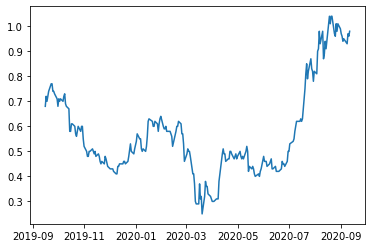

In [ ]:
plt.plot(df['Close'])

In [ ]:
macd = ta.trend.MACD(close=df['Close'], n_slow=31, n_fast= 15,n_sign=9)
df['MACD'] = macd.macd_diff()

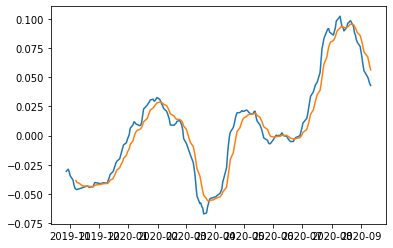

In [ ]:
plt.plot(macd.macd())
plt.plot(macd.macd_signal())

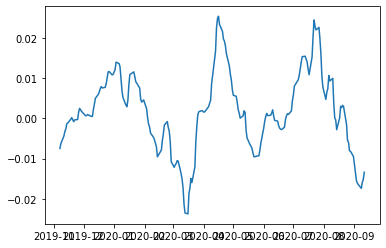

In [ ]:
plt.plot(macd.macd_diff())

In [ ]:
df['CCI'] = ta.trend.cci(df['High'], df['Low'], df['Close'], n=31, c=0.015)

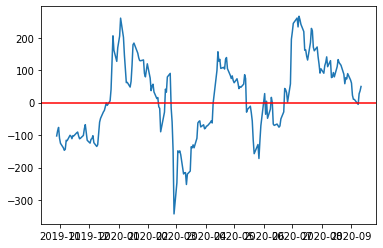

In [ ]:
plt.plot(df['CCI'])
plt.axhline(y=0, color='r', linestyle='-')

In [ ]:
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], n = 14).rsi()

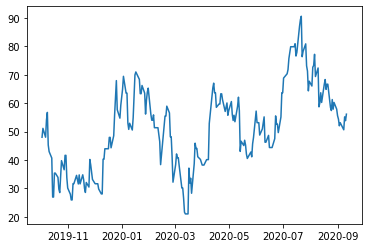

In [ ]:
plt.plot(df['RSI'])

In [ ]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,MACD,CCI,RSI
Date,,,,,,,,,
2020-09-04,0.96,0.91,0.94,0.95,3335400,0.95,-0.016137,9.999244,53.130152
2020-09-08,0.96,0.90,0.92,0.93,2074200,0.93,-0.017382,-5.310826,50.627932
2020-09-09,0.98,0.93,0.94,0.97,2214000,0.97,-0.015888,27.433657,55.174892
2020-09-10,1.00,0.95,0.98,0.96,1592300,0.96,-0.015133,36.247668,53.839924
2020-09-11,1.01,0.96,0.96,0.98,6117000,0.98,-0.013371,49.774360,56.126297
